## Load Libs

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics         import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier


## Read Data Frame

In [2]:
data = pd.read_csv('/content/Breast_Cancer.csv')
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## EDA

In [3]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
data['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [9]:
# NULLS
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

## Visualizations

<Axes: xlabel='Race', ylabel='count'>

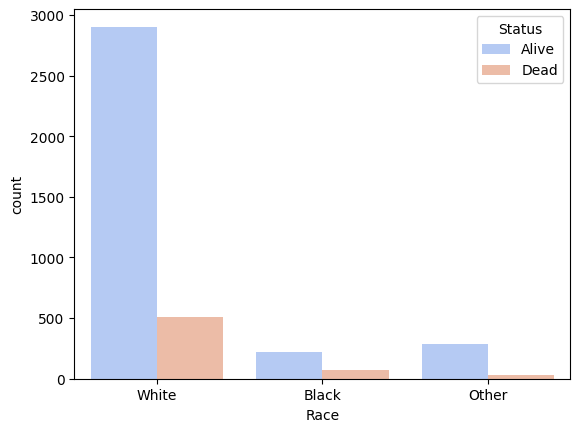

In [10]:
sns.countplot(data,x='Race',hue='Status',palette='coolwarm')

<Axes: xlabel='Status', ylabel='count'>

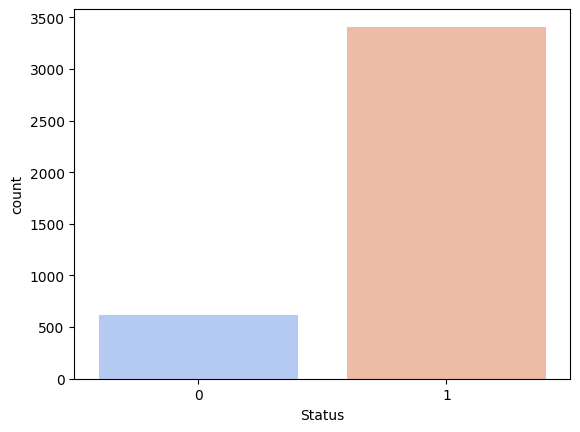

In [38]:
sns.countplot(data,x='Status',palette='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

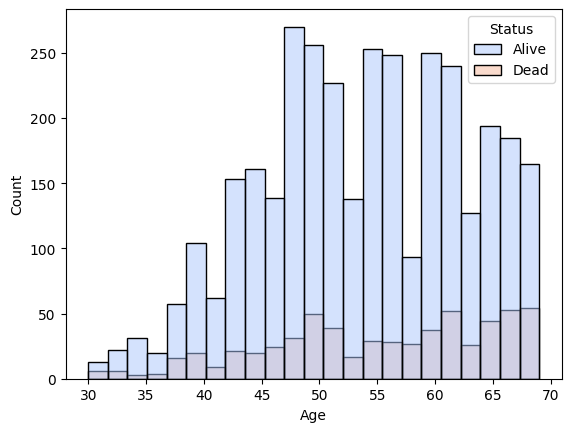

In [12]:
sns.histplot(data,x='Age',hue='Status',palette='coolwarm')

<Axes: >

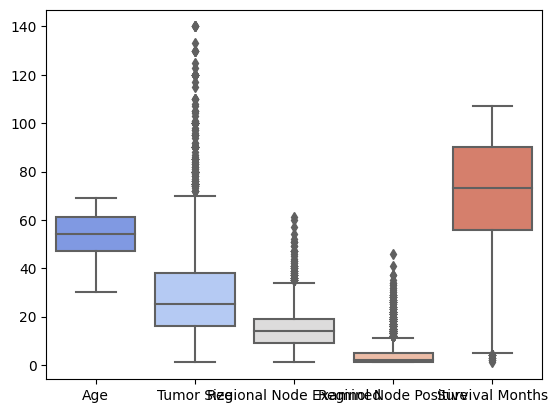

In [14]:
# Outliers
sns.boxplot(data=data,palette='coolwarm')

<Axes: xlabel='Status', ylabel='Survival Months'>

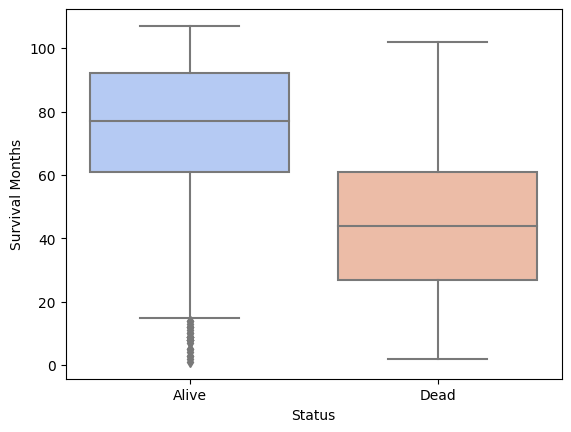

In [15]:
sns.boxplot(data=data, x='Status', y='Survival Months',palette='coolwarm')

<ipython-input-16-b6cd43895d5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

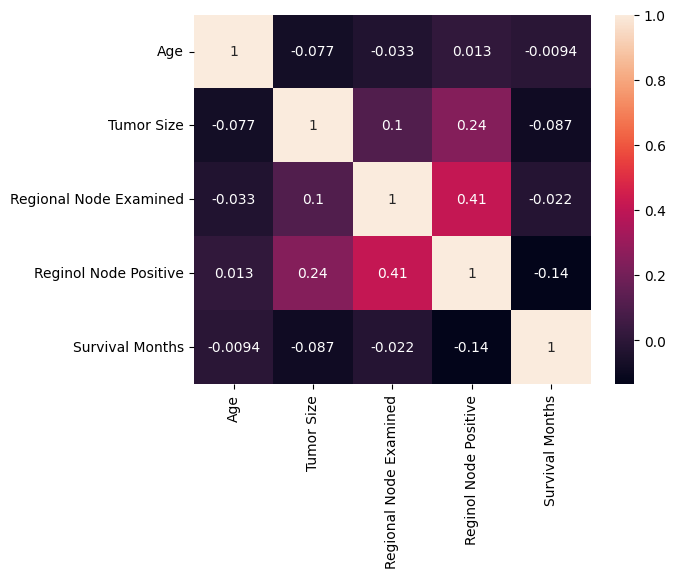

In [16]:
# heatmap
sns.heatmap(data.corr(),annot=True)

In [17]:
data.duplicated().sum()

1

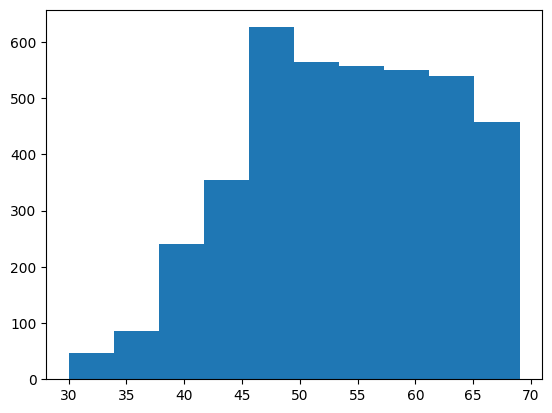

In [18]:
plt.hist(data['Age'],
         histtype='stepfilled',
         orientation='vertical',
        )

plt.show()

## Data Hanling Before Apply Algorithms

In [19]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [20]:
data.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
data.groupby("differentiate").count()

In [21]:
# Handling differentiate Values
data["differentiate"].replace({"Moderately differentiated": 2,"Poorly differentiated": 1,"Well differentiated": 3,"Undifferentiated": 0}, inplace=True)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,1,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,2,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,2,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,1,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,1,3,Regional,41,Positive,Positive,3,1,50,Alive


In [22]:
data["A Stage"].replace({"Regional":1, "Distant": 0}, inplace=True)
data["Estrogen Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
data["Progesterone Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
data["Grade"].replace({" anaplastic; Grade IV":5}, inplace=True)
data["Status"].replace({"Alive":1, "Dead": 0}, inplace=True)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,1,3,1,4,1,1,24,1,60,1
1,50,White,Married,T2,N2,IIIA,2,2,1,35,1,1,14,5,62,1
2,58,White,Divorced,T3,N3,IIIC,2,2,1,63,1,1,14,7,75,1
3,58,White,Married,T1,N1,IIA,1,3,1,18,1,1,2,1,84,1
4,47,White,Married,T2,N1,IIB,1,3,1,41,1,1,3,1,50,1


In [23]:
# Handling Stages Columns
data.rename(columns={"T Stage ": "T Stage"}, inplace=True)
data["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
data["N Stage"].replace({"N1":1, "N2": 2, "N3":3}, inplace=True)
data["6th Stage"].replace({"IIA":1, "IIB": 2, "IIIA":3, "IIIB": 4,"IIIC":5}, inplace=True)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,White,Married,2,2,3,2,2,1,35,1,1,14,5,62,1
2,58,White,Divorced,3,3,5,2,2,1,63,1,1,14,7,75,1
3,58,White,Married,1,1,1,1,3,1,18,1,1,2,1,84,1
4,47,White,Married,2,1,2,1,3,1,41,1,1,3,1,50,1


In [24]:
data['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [25]:
data['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

In [26]:
data["Marital Status"].replace({"Married":1, "Divorced": 2, "Single ":3, "Widowed": 4,"Separated":5}, inplace=True)
data["Race"].replace({"White":1, "Black": 2, "Other":3}, inplace=True)
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,1,1,2,2,3,2,2,1,35,1,1,14,5,62,1
2,58,1,2,3,3,5,2,2,1,63,1,1,14,7,75,1
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,1
4,47,1,1,2,1,2,1,3,1,41,1,1,3,1,50,1


## Splitting Data

In [27]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 42)

print("x_train shape: {}".format(x_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(x_val.shape))
print("y val shape: {}".format(y_test.shape))

x_train shape: (2112, 15)
X_test shape: (1208, 15)
y_train shape: (2112,)
y_test shape: (1208,)
X_val shape: (704, 15)
y val shape: (1208,)


## Logistic Model

In [29]:
LRModel = LogisticRegression()

In [30]:
LRModel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_predict = LRModel.predict(x_test)

In [32]:
acs = accuracy_score(y_test,y_predict)
rcc = recall_score(y_test,y_predict)
fs = f1_score(y_test,y_predict)
ps = precision_score(y_test,y_predict)

In [33]:
print(f"acs {acs}")
print(f"rcc {rcc}")
print(f"fs {fs}")
print(f"ps {ps}")

acs 0.9006622516556292
rcc 0.9777347531461762
fs 0.9439252336448599
ps 0.912375790424571


## DecisionTreeClassifier

In [34]:
DTModel = DecisionTreeClassifier()
DTModel.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
y_predict = DTModel.predict(x_test)

In [36]:
acs = accuracy_score(y_test,y_predict)
rcc = recall_score(y_test,y_predict)
fs = f1_score(y_test,y_predict)
ps = precision_score(y_test,y_predict)

In [37]:
print(f"acs {acs}")
print(f"rcc {rcc}")
print(f"fs {fs}")
print(f"ps {ps}")

acs 0.8543046357615894
rcc 0.9031945788964182
fs 0.9138099902056808
ps 0.9246778989098117
